# EXPERIMENT 4
## 20BTRCD004
## DEEKSHA SATISH NAYAK

# Guided Instruction for implementating Linear Regression with Gradient Decent Algorithm

## Import Libraries.


In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from matplotlib import animation

In [3]:
%matplotlib inline
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, noise=1)

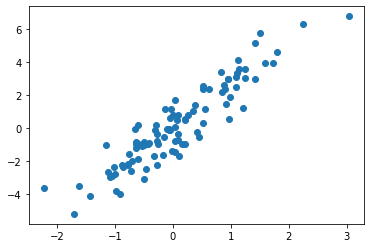

In [4]:
plt.scatter(X, y)

## Use Scikit Learn - Linear Regression Library 

[2.50866999] -0.004711036920982237


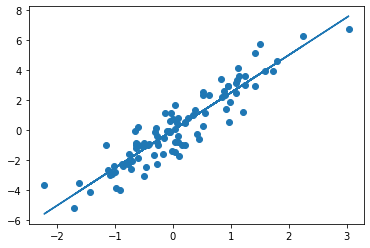

In [5]:
#linear regress using sklearn libs
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
print(lr.coef_, lr.intercept_)
regressed_y = X*lr.coef_ + lr.intercept_
regressed_y = regressed_y.ravel() #flatten the array
plt.plot(X, regressed_y)
plt.scatter(X, y)


In [6]:
#Gradient descent
def gradient_descent(X,y,alpha,m,b):
 y_pred = X*m + b
 y_diff = (y.reshape(-1,1) - y_pred)
 dm = -2*(np.sum(y_diff*X)/X.shape[0])
 db = -2*(np.sum(y_diff)/X.shape[0])
 m = m - alpha*dm
 b = b - alpha*db
 return (m,b)


## Visualization of Linear Regression with Gradient Decent 

<IPython.core.display.Javascript object>


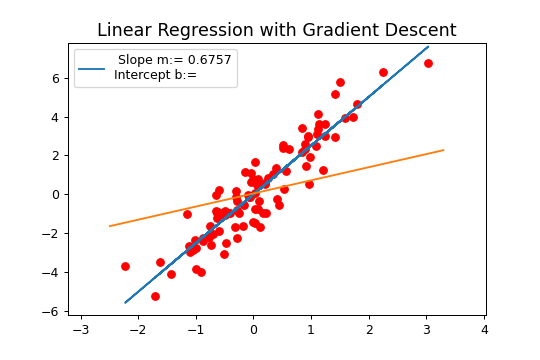

In [9]:
%matplotlib notebook
m = 0 #slope
b = 0 #interscept
alpha = 0.001 # Learning Rate
iter_num = 1000 # number of iterations
fig, ax = plt.subplots()
plt.scatter(X, y, color='red')
plt.plot(X, regressed_y)
line, = plt.plot([], [])
ax.set_title('Linear Regression with Gradient Descent', fontsize = 14)
x_vals = np.arange(ax.get_xlim()[0],ax.get_xlim()[1],0.01)
def init():
 ax.set_xlim(X.min()-1,X.max()+1)
 ax.set_ylim(y.min()-1,y.max()+1)
 return line,
def animate(i):
 global m,b
 m, b = gradient_descent(X,y,alpha,m,b)
 ax.legend([' Slope m:= '+ str(round(m,4)) + '\n' +'Intercept b:= '])
 y_vals = x_vals*m + b
 line.set_xdata(x_vals)
 line.set_ydata(y_vals)
 return line,
 
ani = animation.FuncAnimation(fig, func=animate, frames=iter_num, init_func= init, blit= True)
fig.show()